## Econometric Modeling and Regression Tests with Python

In [1]:
import numpy as np                     
import statsmodels.api as sm     
import statsmodels.stats.api as sms
import statsmodels
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.compat.python import lzip 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Python Basics

Python is an object-oriented programming language. It is designed as a general high-level language which can be used for different things. For this tutorial, python will be used for econometric modeling and preliminaries.

## Matrix Algebra

As a preliminary to econometrics, it is important to understand how matrix to vector multiplication works. It will help determine the beta coefficients for the regression models.

In [2]:
# Let's make an Array

Array_1 = [1,2,3,4,5]
Array_2 = [2,4,8,16,32]

# Let's make a Matrix from this array
Matrix = np.matrix(Array_1).T @ np.matrix(Array_2)
print(Matrix)

[[  2   4   8  16  32]
 [  4   8  16  32  64]
 [  6  12  24  48  96]
 [  8  16  32  64 128]
 [ 10  20  40  80 160]]


In [3]:
n = 10
Matrices = np.random.randint(1,11, size = (10,10))
Matrices

array([[ 7,  9,  7,  3,  8,  6, 10,  5,  7,  2],
       [ 2,  8,  7,  1,  2,  7,  9, 10,  5,  9],
       [ 3, 10,  5,  6,  6,  9,  7,  7,  5,  6],
       [ 7,  2,  3,  1,  5,  2,  7,  1,  2,  2],
       [ 4,  3,  4,  5,  6,  6,  1,  6,  8,  9],
       [ 3,  1,  3,  3,  5,  8,  5, 10,  1,  3],
       [ 3, 10,  1,  1,  7,  2,  8,  3,  1,  2],
       [ 6,  8,  6,  3,  9, 10,  3,  5,  8, 10],
       [10,  4,  3,  4, 10,  2,  3,  5,  3, 10],
       [ 8,  8,  2,  8,  3,  5,  7,  5,  5, 10]])

In [4]:
Vector = np.random.randint(1,10, size = (1,10))
Vector

array([[2, 9, 7, 7, 3, 5, 6, 4, 3, 5]])

In [5]:
Vector @ Matrices

array([[241, 332, 209, 164, 277, 293, 331, 302, 209, 315]])

In [6]:
Matrices.T @ Matrices

array([[345, 320, 209, 202, 351, 271, 305, 266, 244, 355],
       [320, 503, 276, 229, 387, 378, 426, 355, 308, 404],
       [209, 276, 207, 137, 251, 268, 257, 255, 218, 270],
       [202, 229, 137, 171, 210, 215, 193, 206, 178, 259],
       [351, 387, 251, 210, 429, 341, 340, 324, 283, 383],
       [271, 378, 268, 215, 341, 403, 333, 372, 295, 385],
       [305, 426, 257, 193, 340, 333, 436, 341, 253, 327],
       [266, 355, 255, 206, 324, 372, 341, 395, 263, 384],
       [244, 308, 218, 178, 283, 295, 253, 263, 267, 330],
       [355, 404, 270, 259, 383, 385, 327, 384, 330, 519]])

In [7]:
MTM = Matrices.T @ Matrices
MTM_inv = np.linalg.inv(Matrices.T @ Matrices)
(MTM @ MTM_inv).round(2)

array([[ 1., -0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.],
       [-0.,  1.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.],
       [ 0.,  0.,  1.,  0.,  0., -0., -0., -0., -0., -0.],
       [-0.,  0., -0.,  1.,  0., -0.,  0., -0.,  0., -0.],
       [-0., -0., -0.,  0.,  1., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0.,  0.,  1.,  0., -0., -0., -0.],
       [ 0.,  0.,  0., -0.,  0.,  0.,  1., -0., -0., -0.],
       [ 0.,  0., -0., -0.,  0.,  0., -0.,  1.,  0., -0.],
       [-0., -0.,  0.,  0.,  0., -0.,  0., -0.,  1.,  0.],
       [-0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,  1.]])

In [8]:
np.linalg.inv(Matrices.T @ Matrices) @ Matrices.T

array([[ 0.18087013, -0.03122038, -0.22637841, -0.17894904, -0.1905635 ,
         0.09074996, -0.06589209,  0.12223726,  0.04613463,  0.15262987],
       [ 0.11708569, -0.00046702, -0.05791879, -0.21381772, -0.14105246,
        -0.00544163,  0.0118668 ,  0.06929172,  0.04476884,  0.06666379],
       [ 0.03848582,  0.07209479,  0.29836712,  0.04485979, -0.10547076,
        -0.13418338, -0.22258412, -0.08999159,  0.1682628 , -0.15915039],
       [-0.04431757, -0.05346845,  0.2684006 ,  0.07129027,  0.06328613,
        -0.0630977 , -0.08042722, -0.15609725,  0.0501052 , -0.03426402],
       [-0.09304795, -0.03767707,  0.11229502,  0.12020204,  0.12175316,
        -0.02469211,  0.0787444 , -0.05238648,  0.02449426, -0.12892534],
       [-0.05972686, -0.04296833, -0.0105728 ,  0.05649642, -0.07417739,
         0.07644001, -0.01047474,  0.14874643, -0.09804806,  0.04088549],
       [-0.13876334,  0.03131002,  0.06573283,  0.2578075 ,  0.13513531,
        -0.0289734 ,  0.08174391, -0.08614007

In [9]:
np.linalg.inv(Matrices.T @ Matrices) @ Matrices.T @ Vector.T

array([[-1.87932632],
       [-1.30655985],
       [ 0.15464932],
       [ 0.55439803],
       [ 1.03586536],
       [ 0.41738506],
       [ 2.20126967],
       [-1.3646472 ],
       [-0.70076619],
       [ 1.54662643]])

This is basically:

$$\hat \beta = (X^TX)^{-1}X^Ty$$

Where $y$ is the output vector (or vector of the outcome variables), and $X$ is the matrix of independent variables.

In [10]:
X = Matrices
y = Vector.T

np.linalg.inv(X.T @ X) @ X.T @ y

array([[-1.87932632],
       [-1.30655985],
       [ 0.15464932],
       [ 0.55439803],
       [ 1.03586536],
       [ 0.41738506],
       [ 2.20126967],
       [-1.3646472 ],
       [-0.70076619],
       [ 1.54662643]])

The output represents the beta coefficients, which will be helpful in regression analysis.

## Importing Datasets

In [11]:
data = pd.read_csv('New_Phone.csv')  
data

,Country,Cellphone,Income,PC
0,Argentina,17.76,11410.0,8.20
1,Australia,71.95,28780.0,60.18
2,Belgium,79.28,28920.0,31.81
3,Brazil,26.36,7510.0,7.48
4,Bulgaria,46.64,75.4,5.19
5,Canada,41.90,30040.0,48.70
6,China,21.48,4980.0,2.76
7,Colombia,14.13,6410.0,4.93
8,Czech Republic,96.46,15600.0,17.74
9,Ecuador,18.92,3940.0,3.24


## Statistics

Another preliminary to econometrics is statistics. It is important to understand what the p-values, t statistics, beta coefficients, and other statistics represent for econometric modeling.

In [12]:
x_0 = data ['Income']
y_0 = data ['PC']
x_0 = sm.add_constant (x_0)
model = sm.OLS(y_0,x_0)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PC   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     155.2
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           8.14e-14
Time:                        13:46:34   Log-Likelihood:                -122.54
No. Observations:                  34   AIC:                             249.1
Df Residuals:                      32   BIC:                             252.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5833      2.744     -2.399      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
## Mean
Mean = np.mean(x_0)
Mean

const         1.000000
Income    15819.864706
dtype: float64

In [14]:
from pandas.compat.numpy.function import MEDIAN_DEFAULTS
## Median
Median = np.median(x_0)
Median

38.2

In [15]:
## Mode
import scipy.stats
Mode = scipy.stats.mode(x_0)
print(Mode[0])

[[1.00e+00 3.94e+03]]


In [16]:
## Standard Deviation
Stdev = np.std(x_0)
Stdev

const         0.000000
Income    11060.230596
dtype: float64

## Introduction to Econometrics

Econometric modeling is important to determine relationship between the independent and dependent variables. This will help understnad how market and economic trends change overtime. However, given that econometric regression models may have biases, it is important to test for assumptions and conduct regression tests for heteroscedasticity, autocorrelation, multicollinearity, and the like. 

### Classical Linear Regression

Derive the generalized form of the OLS estimator for the ***coefficients for a multiple-variable regression model*** for independent variables $X_k$ where $k = 1,...,K$.

Matrix algebra will be applied to this equation in the next steps to derive the generalized form of the OLS estimator with respect to the beta coefficients.

$
\begin {bmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{n}
\end{bmatrix} = 
\begin{bmatrix}
1 & X_{11} & X_{21} & \cdots & X_{k1}\\
1 & X_{12} & X_{22} & \cdots & X_{k2}\\
\vdots & \vdots & \vdots & \ddots & \vdots
\\
1 & X_{1n} & X_{2n} & \cdots & X_{kn}
\end{bmatrix}
\begin{bmatrix}
\hat\beta_{0}\\
\hat\beta_{1}\\
\vdots\\
\hat\beta_{k}
\end{bmatrix} +
\begin{bmatrix}
\hat\epsilon_{0}\\
\hat\epsilon_{1}\\
\vdots\\
\hat\epsilon_{n}
\end{bmatrix}
$

The matrix for errors or $\hat\epsilon$ will be isolated to the other side of the equation. This will be helpful for the next step, where the matrix of $\hat\epsilon$ will be manipulated to form the equation for the residual sum of squares. 

$
\begin{bmatrix}
\hat\epsilon_{0}\\
\hat\epsilon_{1}\\
\vdots\\
\hat\epsilon_{n}
\end{bmatrix} = 
\begin {bmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{n}
\end{bmatrix}  -
\begin{pmatrix}
\begin{bmatrix}
1 & X_{11} & X_{21} & \cdots & X_{k1}\\
1 & X_{12} & X_{22} & \cdots & X_{k2}\\
\vdots & \vdots & \vdots & \ddots & \vdots
\\
1 & X_{1n} & X_{2n} & \cdots & X_{kn}
\end{bmatrix}
\begin{bmatrix}
\hat\beta_{0}\\
\hat\beta_{1}\\
\vdots\\
\hat\beta_{k}
\end{bmatrix}
\end{pmatrix}
$


In the k-variable or multi-variable regression model, it's important to minimize the residual sum of squares to ensure that the OLS estimator follows all assumptions.

The original form of the equation for residual sum of squares is stated as:

$\sum\hat\epsilon^{2}_{n} = \sum(Y_{n}-\hat\beta_{0}-\hat\beta_{1}X_{1n} - \cdots -\hat\beta_{k}X_{kn})^{2}$.

In matrix notation, the above equation is equivalent to minimizing $\hat\epsilon^{T}\hat\epsilon$, as seen below. 

$\hat\epsilon^{T}\hat\epsilon = \begin{bmatrix}
\hat \epsilon_{0} & \hat \epsilon_{1} & \cdots & \hat \epsilon_{n}
\end{bmatrix}
\begin{bmatrix}
\hat \epsilon_{0}\\
\hat \epsilon_{1}\\
\vdots \\
\hat \epsilon_{n}
\end{bmatrix}
 = \hat \epsilon^{2}_{0} + \hat \epsilon^{2}_{1} + \cdots + \hat\epsilon^{2}_{n} = \sum\hat\epsilon^{2}_{n} $

With this, the transpose of the matrix of $\hat\epsilon$ will be multiplied to the matrix of $\hat\epsilon$. Subsequently, on the other side of the equation, the transpose of the matrix of $(y - X\hat\beta)$ will also be multiplied to the matrix of $(y - X\hat\beta)$. 

$\hat\epsilon^{T}\hat\epsilon = (y-X\hat\beta)^{T}(y-X\hat\beta)$

$\hat\epsilon^{T}\hat\epsilon = y^{T}y - 2\hat\beta^{T}X^{T}y   + \hat\beta^{T}X^{T}X \hat\beta$

Note: Since $\hat\beta^{T}X^{T}y$ is a scalar, it is equivalent to its transpose, $\hat\beta X y^{T}$.

The above equation can be restated as follows:

$\hat\epsilon^{T}\hat\epsilon = y^{T}y - 2\hat\beta X y^{T}   + \hat\beta^{T}X^{T}X \hat\beta$

In matrix form:

$
\begin{pmatrix}
\begin{bmatrix}
\hat \epsilon_{0} & \hat \epsilon_{1} & \cdots & \hat \epsilon_{n}
\end{bmatrix}
\begin{bmatrix}
\hat \epsilon_{0}\\
\hat \epsilon_{1}\\
\vdots \\
\hat \epsilon_{n}
\end{bmatrix}
\end{pmatrix}  = 
\begin{pmatrix}
\begin{bmatrix}
y_{1} & y_{2} & \cdots & y_{n}
\end{bmatrix}
\begin{bmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{n}
\end{bmatrix} 
\end{pmatrix}
 -2
\begin{pmatrix}
\begin{bmatrix}
\hat\beta_{0}\\
\hat\beta_{1}\\
\vdots \\
\hat\beta_{k}
\end{bmatrix}
\begin{bmatrix}
1 & X_{11} & X_{21} & \cdots & X_{k1}\\
1 & X_{12} & X_{22} & \cdots & X_{k2}\\
\vdots & \vdots & \vdots & \ddots & \vdots
\\
1 & X_{1n} & X_{2n} & \cdots & X_{kn}
\end{bmatrix}
\
\begin{bmatrix}
y_{1} & y_{2} & \cdots & y_{n}
\end{bmatrix}
\end{pmatrix} +
\begin{pmatrix}
\begin{bmatrix}
\hat\beta_{0} & \hat\beta_{1} & \cdots & \hat\beta_{k}
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
X_{11} & X_{12} & \cdots & X_{1n} \\
X_{21} & X_{22} & \cdots & X_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
X_{k1} & X_{k2} & \cdots & X_{kn}
\end{bmatrix}
\begin{bmatrix}
1 & X_{11} & X_{21} & \cdots & X_{k1}\\
1 & X_{12} & X_{22} & \cdots & X_{k2}\\
\vdots & \vdots & \vdots & \ddots & \vdots
\\
1 & X_{1n} & X_{2n} & \cdots & X_{kn}
\end{bmatrix}
\begin{bmatrix}
\hat\beta_{0}\\
\hat\beta_{1}\\
\vdots \\
\hat\beta_{k}
\end{bmatrix}
\end{pmatrix}
$

Matrix differentiation needs to be applied since the OLS regression model should be derived with respect to the beta coefficients.

Note: since $\hat\beta X y^{T}$ is a scalar, it is equivalent to $X y^{T} \hat\beta$. From the above equation, $\frac{∂ (X y^{T} \hat\beta)}{\partial \hat\beta} = X^{T}y$ and $\frac{∂ (\hat \beta ^{T} X^{T} X \hat \beta)}{\partial \hat\beta} = 2 X^{T} X \hat\beta$. 

The equation for $\frac{\partial\hat\epsilon^{T}\hat\epsilon}{\partial\hat\beta}$ can now be stated as follows:

$\frac{\partial\hat\epsilon^{T}\hat\epsilon}{\partial\hat\beta} = -2X^{T}y + 2X^{T}X\hat\beta$

The equation of $\frac{\partial \hat\epsilon^{T}\hat\epsilon}{\partial \hat\beta}$ should be set to 0 to minimize the log-likelihood of a normal distribution.

The equation now becomes: $2X^{T}y = 2 X^{T} X \hat\beta$. Dividing both sides by 2, $X^{T}y = X^{T} X \hat\beta$.

In matrix form:

$ 
\begin{pmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
X_{11} & X_{12} & \cdots & X_{1n} \\
X_{21} & X_{22} & \cdots & X_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
X_{k1} & X_{k2} & \cdots & X_{kn}
\end{bmatrix}
\begin {bmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{n}
\end{bmatrix} 
\end{pmatrix} = 
\begin{pmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
X_{11} & X_{12} & \cdots & X_{1n} \\
X_{21} & X_{22} & \cdots & X_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
X_{k1} & X_{k2} & \cdots & X_{kn}
\end{bmatrix}
\begin{bmatrix}
1 & X_{11} & X_{21} & \cdots & X_{k1} \\
1 & X_{12} & X_{22} & \cdots & X_{k2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & X_{1n} & X_{2n} & \cdots & X_{kn}
\end{bmatrix}
\begin{bmatrix}
\hat\beta_{0}\\
\hat\beta_{1}\\
\vdots \\
\hat\beta_{k}
\end{bmatrix}
\end{pmatrix}
$

The matrix for beta coefficients will now be isolated to the one side of the equation. $X^TX$ will be transferred to the other side of the equation using the property of matrix inversion. With this, the generalized form of the OLS estimator for coefficients of a multivariate regression model has been derived.

The equation now becomes: $\hat\beta = (X^{T}X)^{-1}(X^{T}y)$

$
\begin{bmatrix}
\hat\beta_{0}\\
\hat\beta_{1}\\
\vdots \\
\hat\beta_{k}
\end{bmatrix} =
\begin{pmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
X_{11} & X_{12} & \cdots & X_{1n} \\
X_{21} & X_{22} & \cdots & X_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
X_{k1} & X_{k2} & \cdots & X_{kn}
\end{bmatrix}
\begin{bmatrix}
1 & X_{11} & X_{21} & \cdots & X_{k1} \\
1 & X_{12} & X_{22} & \cdots & X_{k2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & X_{1n} & X_{2n} & \cdots & X_{kn}
\end{bmatrix}
\end{pmatrix}^{-1}
\begin{pmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
X_{11} & X_{12} & \cdots & X_{1n} \\
X_{21} & X_{22} & \cdots & X_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
X_{k1} & X_{k2} & \cdots & X_{kn}
\end{bmatrix}
\begin {bmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{n}
\end{bmatrix} 
\end{pmatrix}
$

In [17]:
## Compute for Standard Error

The transpose of the matrix for the beta coefficients (from the model in the "Statistics" section) will be obtained. This will transform the matrix into a row vector. The transpose matrix of the beta coefficients will then be multiplied to the matrix of X variables. Each column of the transpose matrix of the beta coefficients will be multiplied to each column of the matrix of X variables. The axis will be set equal to 1 to make the array into a row.

In [18]:
beta = np.linalg.inv (x_0.T@x_0)@(x_0.T@y_0)
beta

array([-6.58328114e+00,  1.77067321e-03])

In [19]:
yhat = np.sum(beta.T*x_0, axis = 1) 
yhat

0     13.620100
1     44.376694
2     44.624588
3      6.714475
4     -6.449772
5     46.607742
6      2.234671
7      4.766734
8     21.039221
9      0.393171
10     0.393171
11    42.358126
12    42.305006
13    28.653116
14     0.658772
15    17.922836
16    -1.483742
17    -0.899420
18    40.923881
19    43.792372
20     9.317364
21    43.987146
22    -2.971108
23    13.265965
24     9.264244
25    16.842725
26    11.353638
27    32.637130
28    40.711400
29    50.467810
30     6.608234
31    42.446660
32    60.259632
33     1.827417
dtype: float64

In [20]:
beta.T*x_0

,const,Income
0,-6.583281,20.203381
1,-6.583281,50.959975
2,-6.583281,51.207869
3,-6.583281,13.297756
4,-6.583281,0.133509
5,-6.583281,53.191023
6,-6.583281,8.817953
7,-6.583281,11.350015
8,-6.583281,27.622502
9,-6.583281,6.976452


"eps_hat" is the $\hat\epsilon$ or the matrix for the error term. This can be computed by subtracting the transpose of $\hat y$ of the estimated values for $y$ from the transpose of $y$ of the actual values of $y$. The equation is as follows: $\hat\epsilon = y - \hat y$. Since there are 34 observations (34 rows) and 2 parameters (2 columns), the degree of freedom is 32. The sum of squares of $\hat\epsilon$ will then be divided by the degree of freedom to get the standard error of regression.

In [21]:
eps_hat = ((y_0.T - yhat.T))
eps_hat

0     -5.420100
1     15.803306
2    -12.814588
3      0.765525
4     11.639772
5      2.092258
6      0.525329
7      0.163266
8     -3.299221
9      2.846829
10     2.516829
11    -7.648126
12     6.164994
13   -20.483116
14     0.781228
15    -7.082836
16     2.203742
17     2.089420
18   -17.853881
19    -5.572372
20    -1.017364
21     2.672854
22     3.391108
23     0.934035
24    -0.394244
25    -3.172725
26    -4.093638
27   -13.037130
28    21.418600
29    20.402190
30    -2.628234
31    -1.876660
32     5.720368
33     4.262583
dtype: float64

In [22]:
se = np.sum(eps_hat**2)/32
se

84.03453926626128

Before proceeding to the next steps, the model: $y = X \beta + \epsilon$ or $\hat\beta = (X^{T}X)^{-1}(X^{T}y)$. The model can be restated as follows:

$\hat\beta = (X^{T}X)^{-1}[(X^{T})(X \beta + \epsilon)]$

>$=(X^TX)^{-1}X^TX\beta + (X^TX)^{-1}X^T\epsilon$

>$=\beta+(X^TX)^{-1}X^T\epsilon$

Therefore, $\hat\beta-\beta = (X^TX)^{-1}X^T\epsilon$.

The variance-covariance for $\hat\beta$ is derived as follows:

$var-cov(\hat\beta) = E[(\hat\beta-\beta)(\hat\beta-\beta)^{T}]$

>>>>$=E([(X^TX)^{-1}X^T\epsilon][(X^TX)^{-1}X^T\epsilon]^{T})$

>>>>$= E[(X^TX)^{-1}X^T\epsilon\epsilon^{T}X(X^{T}X)^{-1}]$

On the assumption that the values of $X$ are non-stochastic, the variance-covariance of $\hat\beta$ can be stated as follows:

$var-cov(\hat\beta) = (X^{T}X)^{-1}X^TE(\epsilon\epsilon^{T})X(X^{T}X)^{-1}$

>>>> $=(X^{T}X)^{-1}X^{T}\sigma^{2}IX(X^{T}X)^{-1}$

$var-cov(\hat\beta) = \sigma^{2}(X^{T}X)^{-1}$

The covariance matrix will be obtained. Afterwards, its diagonal will be derived to get the variance.

The covariance matrix is equivalent to the inverse of the matrix of $X^{T}X$.

In [23]:
CovMx = np.linalg.inv(x_0.T@x_0)
CovMx

array([[ 8.95842916e-02, -3.80360566e-06],
       [-3.80360566e-06,  2.40432249e-10]])

In [24]:
DiagCovMx = np.diag(CovMx)
DiagCovMx

array([8.95842916e-02, 2.40432249e-10])

In [25]:
Var_Beta = se*DiagCovMx
Var_Beta

array([7.52817467e+00, 2.02046133e-08])

In [26]:
StdError = np.sqrt(Var_Beta)
StdError

array([2.74375193e+00, 1.42142933e-04])

In [27]:
## Compute for t-test statistic
t_c = beta[0]/StdError[0]
t_1 = beta[1]/StdError[1]
print(t_c, t_1)

-2.3993718461373663 12.456990809979692


In [28]:
## Compute for p-value 
print(scipy.stats.t.sf(np.abs(t_c), 34-2)*2)
print(scipy.stats.t.sf(np.abs(t_1), 34-2)*2)

0.02241881076117051
8.136949902320029e-14


In [29]:
## Compute for Total Sum of Squares
TSS = np.sum((y_0 - np.mean(y_0))**2) 
TSS

15729.30102647059

In [30]:
## Compute for R-Squared
R_Sq = 1 - (se*32/TSS)  
R_Sq

0.8290384771710511

In [31]:
## Compute for Mean-Squared Error
MSE = (se*32)/len(x_0)
MSE

79.09133107412826

In [32]:
## Compute for Root Mean-Squared Error
RMSE = np.sqrt(MSE)
RMSE

8.893330707565545

In [33]:
result.mse_model

13040.19576995023

In [34]:
## Compute for F-Statistic
F = result.mse_model/result.mse_resid
print(F)

155.17662003991848


In [35]:
x = data [['PC', 'Cellphone']]
y = data ['Income']
x = sm.add_constant (x)
results = sm.OLS(y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     125.2
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           1.42e-15
Time:                        13:46:34   Log-Likelihood:                -327.32
No. Observations:                  34   AIC:                             660.6
Df Residuals:                      31   BIC:                             665.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2485.6445   1225.992      2.027      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<p align = "justify"> Looking into the various coefficients of the model, a lot of factors need to be considered when analyzing multiple regression models. The partial regression coefficient of PC  is 361.0188 on the condition that the influenceof the other independent variable on the dependent variable is held constant. Income increases by 361 units for every 1 unit increase in PC sold. The partial regression coefficient of cellphone is 112.9249 on the condition that the influence of the other independent variable on the dependent variable is held constant. The p-values, denoted by (P>|t|) of PC (0.000) and Cellphone (0.000) are all statistically significant. Based on the p-values of these variables, the null hypothesis can be rejected. In addition, looking into the R-squared value, 0.890, 89% of the variation in the dependent variable (Income) is explained by the independent variables.

<p align = "justify"> One way to determine the validity of the model is to assess whether or not it satisfies OLS assumptions.
The Gauss-Markov Theorem has 3 assumptions:
1. Unbiased, where the expected value of the estimator E[β1] is equal to the true value of the parameter, β1 E(εi|Xi) = 0
2. Minimum Variance in the class of all such linear unbiased estimators, or that the estimator is an efficient estimator. var(εi|Xi) = 0
3. Error covariances are zero E(εi,εj|X1,...,Xn) = 0

<p align = "justify"> With these assumptions, the OLS estimator is expected to be the best linear unbiased estimator. The OLS linear regression should possess all the characteristics listed in the assumptions above.

<p align = "justify"> Applying this to the model, E(εi|Xi) is not equal to 0. The variance of the OLS linear regression model is not at minimum. Moreover, referring to the computations for the standard error of the beta coefficients, the error covariances are not zero. There is also possiblemulticollinearity between these variables since it's possible that the independent variables are correlated. Based on these assumptions, biasedness exists in the model. On a practical note, it is important to consider other factors that affect income.

<p align = "justify"> Overall, there are various factors to consider to understand whether or not the model is unbiased. 


### Normality of Residuals

It is important to understand the normality of residuals since this will also help determine whether there is biasedness in the model.

In [36]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(result.resid) 
lzip(name, test)

[('Jarque-Bera', 1.1268062186189556),
 ('Chi^2 two-tail prob.', 0.5692684808468614),
 ('Skew', 0.19094958010360286),
 ('Kurtosis', 3.805943953597599)]

In [37]:
name = ["Chi^2", "Two-tail probability"]
test = sms.omni_normtest(result.resid)
lzip(name, test)

[('Chi^2', 2.239734454064334), ('Two-tail probability', 0.32632311863578073)]

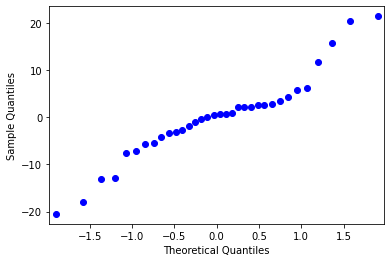

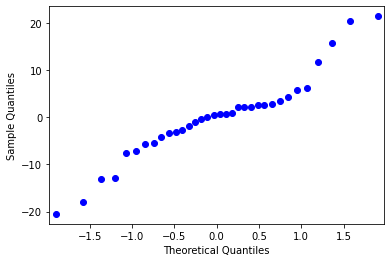

In [38]:
sm.qqplot(result.resid) 

Based on the probability results, the residuals are normally distributed.

### Heteroscedastity Test
Another assumption of the ordinary least squares regression model is that homoscedasticity exists. If heteroscedasticity exists, the model is biased and ineffective.

In [65]:
## Breush-Pagan Test

name = ["Breusch Pagan Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

[('Breusch Pagan Lagrange multiplier statistic', 7.078377088183213),
 ('p-value', 0.007801963989786586),
 ('f-value', 8.413611154268157),
 ('f p-value', 0.006682960871294514)]

Given that the p-value lies below the 5% confidence interval, the null hypothesis is rejected. Heteroscedasticity exists in the model.

### Multicollinearity Test

It is important that the independent variables in the regression model are not correlated to ensure effectiveness and unbiasedness of the model.

In [39]:
## Condition Number
np.linalg.cond(result.model.exog)

33687.97943093248

In [40]:
## Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
x = data [['PC', 'Cellphone']]
x = sm.add_constant (x)
vif_data["feature"] = x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
print(vif_data)

     feature       VIF
0      const  3.457765
1         PC  1.714575
2  Cellphone  1.714575


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def variance_inflation_factors(exog_data):
    '''
    Parameters
    ----------
    exog_data : dataframe, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression.

    Returns
    -------
    vif : Series
        variance inflation factors
    '''
    exog_data = add_constant(x)
    vifs = pd.Series(
        [1 / (1. - OLS(exog_data[col].values, 
                       exog_data.loc[:, exog_data.columns != col].values).fit().rsquared) 
         for col in exog_data],
        index=exog_data.columns,
        name='VIF'
    )
    return vifs
variance_inflation_factors(data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const        3.457765
PC           1.714575
Cellphone    1.714575
Name: VIF, dtype: float64

In [42]:
## Compute for Variance Inflation Factor 

In [43]:
x = data [['PC', 'Cellphone']]
pd.Series(np.linalg.inv(x.corr().to_numpy()).diagonal(), 
                 index=x.columns, 
                 name='VIF')

PC           1.714575
Cellphone    1.714575
Name: VIF, dtype: float64

In [44]:
x = data [['PC', 'Cellphone']]
x_cor = x.corr()
pd.Series(np.linalg.inv(x.corr().values).diagonal(), index=x_cor.index)

PC           1.714575
Cellphone    1.714575
dtype: float64

In [45]:
correl = np.corrcoef(data [['PC', 'Cellphone']], rowvar=0)
print(correl)

[[1.         0.64557354]
 [0.64557354 1.        ]]


In [46]:
correl_inv = np.linalg.inv(correl)
correl_inv

array([[ 1.71457531, -1.10688445],
       [-1.10688445,  1.71457531]])

In [47]:
VIF = np.diag(correl_inv)
VIF

array([1.71457531, 1.71457531])

Based on the results, with the VIF being approximately 1.7146, multicollinearity doesn't exist in the model.

### Autocorrelation Test

Autocorrelation tests are needed for data collected for a period of time. To ensure that the model is the best linear unbiased estimator, autocorrelation should not exist in the model. 

In [48]:
## Durbin-Watson Test

In [49]:
## Computing for Durbin-Watson

In [50]:
rresid = np.array(result.resid)  
rresid

array([ -5.42010014,  15.80330628, -12.81458797,   0.76552537,
        11.63977238,   2.09225804,   0.52532858,   0.16326589,
        -3.29922087,   2.84682871,   2.51682871,  -7.64812626,
         6.16499393, -20.48311565,   0.78122773,  -7.08283603,
         2.20374231,   2.08942015, -17.85388097,  -5.57237156,
        -1.01736425,   2.67285439,   3.3911078 ,   0.9340345 ,
        -0.39424405,  -3.17272537,  -4.09363843, -13.03713037,
        21.41859982,  20.40219045,  -2.62823424,  -1.87665992,
         5.72036763,   4.26258341])

In [51]:
## residuals
yhat = np.sum(beta.T*x_0, axis = 1) 
eps_hat = np.array((y_0.T - yhat.T))
eps_hat

array([ -5.42010014,  15.80330628, -12.81458797,   0.76552537,
        11.63977238,   2.09225804,   0.52532858,   0.16326589,
        -3.29922087,   2.84682871,   2.51682871,  -7.64812626,
         6.16499393, -20.48311565,   0.78122773,  -7.08283603,
         2.20374231,   2.08942015, -17.85388097,  -5.57237156,
        -1.01736425,   2.67285439,   3.3911078 ,   0.9340345 ,
        -0.39424405,  -3.17272537,  -4.09363843, -13.03713037,
        21.41859982,  20.40219045,  -2.62823424,  -1.87665992,
         5.72036763,   4.26258341])

In [52]:
resid2 = np.array([15.80330628, -12.81458797,   0.76552537,
        11.63977238,   2.09225804,   0.52532858,   0.16326589,
        -3.29922087,   2.84682871,   2.51682871,  -7.64812626,
         6.16499393, -20.48311565,   0.78122773,  -7.08283603,
         2.20374231,   2.08942015, -17.85388097,  -5.57237156,
        -1.01736425,   2.67285439,   3.3911078 ,   0.9340345 ,
        -0.39424405,  -3.17272537,  -4.09363843, -13.03713037,
        21.41859982,  20.40219045,  -2.62823424,  -1.87665992,
         5.72036763,   4.26258341])
resid2

array([ 15.80330628, -12.81458797,   0.76552537,  11.63977238,
         2.09225804,   0.52532858,   0.16326589,  -3.29922087,
         2.84682871,   2.51682871,  -7.64812626,   6.16499393,
       -20.48311565,   0.78122773,  -7.08283603,   2.20374231,
         2.08942015, -17.85388097,  -5.57237156,  -1.01736425,
         2.67285439,   3.3911078 ,   0.9340345 ,  -0.39424405,
        -3.17272537,  -4.09363843, -13.03713037,  21.41859982,
        20.40219045,  -2.62823424,  -1.87665992,   5.72036763,
         4.26258341])

In [53]:
resid1 = np.array([-5.42010014,  15.80330628, -12.81458797,   0.76552537,
        11.63977238,   2.09225804,   0.52532858,   0.16326589,
        -3.29922087,   2.84682871,   2.51682871,  -7.64812626,
         6.16499393, -20.48311565,   0.78122773,  -7.08283603,
         2.20374231,   2.08942015, -17.85388097,  -5.57237156,
        -1.01736425,   2.67285439,   3.3911078 ,   0.9340345 ,
        -0.39424405,  -3.17272537,  -4.09363843, -13.03713037,
        21.41859982,  20.40219045,  -2.62823424,  -1.87665992,
         5.72036763])
resid1

array([ -5.42010014,  15.80330628, -12.81458797,   0.76552537,
        11.63977238,   2.09225804,   0.52532858,   0.16326589,
        -3.29922087,   2.84682871,   2.51682871,  -7.64812626,
         6.16499393, -20.48311565,   0.78122773,  -7.08283603,
         2.20374231,   2.08942015, -17.85388097,  -5.57237156,
        -1.01736425,   2.67285439,   3.3911078 ,   0.9340345 ,
        -0.39424405,  -3.17272537,  -4.09363843, -13.03713037,
        21.41859982,  20.40219045,  -2.62823424,  -1.87665992,
         5.72036763])

In [54]:
diffr = resid2-resid1
diffr

array([ 21.22340642, -28.61789425,  13.58011334,  10.87424701,
        -9.54751434,  -1.56692946,  -0.36206269,  -3.46248676,
         6.14604958,  -0.33      , -10.16495497,  13.81312019,
       -26.64810958,  21.26434338,  -7.86406376,   9.28657834,
        -0.11432216, -19.94330112,  12.28150941,   4.55500731,
         3.69021864,   0.71825341,  -2.4570733 ,  -1.32827855,
        -2.77848132,  -0.92091306,  -8.94349194,  34.45573019,
        -1.01640937, -23.03042469,   0.75157432,   7.59702755,
        -1.45778422])

In [55]:
ssqdr = np.sum(diffr**2)
ssqdr

5779.062118609152

In [56]:
ssqr = np.sum(rresid**2)
ssqr

2689.1052565203604

In [57]:
ssqdr/ssqr

2.1490650485310954

Given that the Durbin-Watson statistic is slightly above 2, autocorrelations does not exist in the model.

### Linearity and Equal Variance

The regression model should also possess equal variance to ensure that the residuals are normally distributed and outliers are limited. If variance is not equal, the model is biased.

In [60]:
## Harvey Collier

In [61]:
name = ["t value", "p value"]
test = sms.linear_harvey_collier(result)
lzip(name, test)

[('t value', 0.34348532895727707), ('p value', 0.7336290235020273)]

The test used for this is the Harvey Collier test. Based on the test results, linearity and equal variance exists in the model.

In [62]:
pred_val = result.fittedvalues.copy()
true_val = data ['Income'].values.copy()
residual = true_val - pred_val

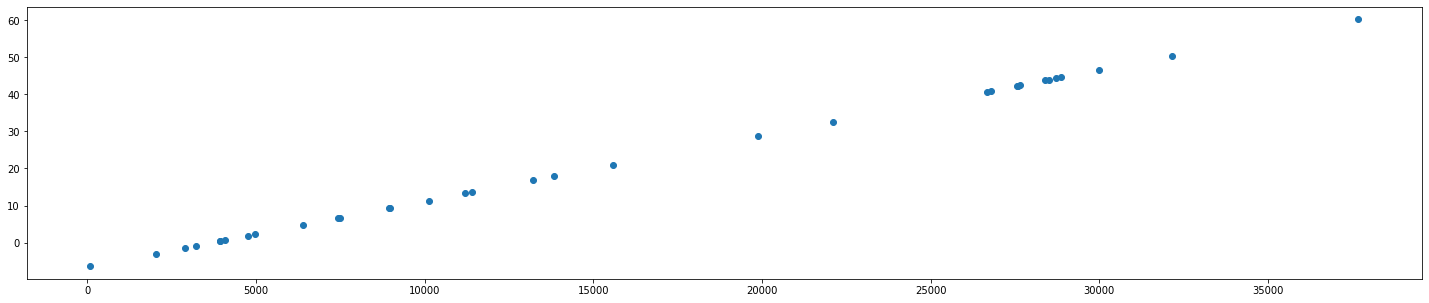

In [63]:
fig, ax = plt.subplots(figsize=(25,5))
_ = ax.scatter(residual, pred_val)

### Normality Probability Plot

0.907045316204616

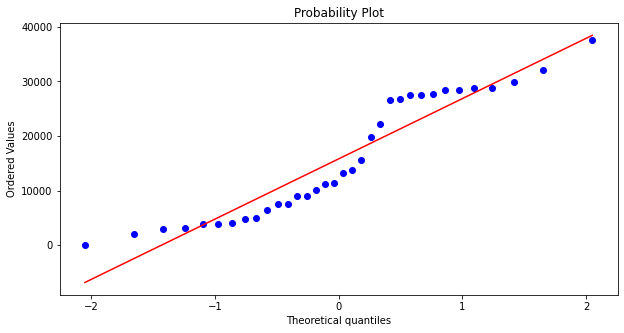

In [64]:
fig, ax = plt.subplots(figsize=(10,5))
_, (_, _, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2